# Statistiche e grafici delle risoluzioni dei cubi di Rubik

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import modulo_rubik

df = read_csv("../database.csv", sep="\t", parse_dates=["Data"])
# Inserimento colonna "Tempo" con i secondi convertiti in minuti e secondi
df.insert(loc=2, column="Tempo", value=df["Secondi"].apply(modulo_rubik.conversione_secondi))

# Record personali per tipo di cubo 🥇🥈🥉

In [2]:
# Record
df.groupby(by="Cubo").min().sort_values(by="Secondi").drop(columns=["Data", "Secondi"])

,Tempo
Cubo,
2x2,"(0, 15.12)"
3x3,"(0, 40.44)"
4x4,"(3, 30.86)"
Mirror,"(3, 58.89)"
5x5,"(7, 59.65)"
Megaminx,"(30, 10.61)"


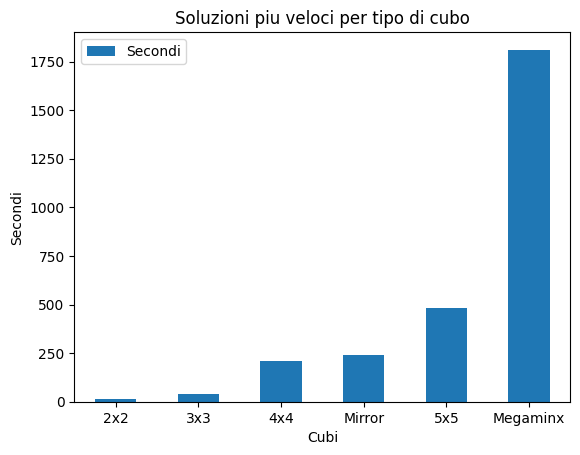

In [3]:
# Creazione grafico
df.drop(columns=["Data", "Tempo"]).groupby(by="Cubo").min().sort_values(by="Secondi").plot.bar()
plt.title("Soluzioni piu veloci per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")
plt.xticks(rotation=0)
plt.show()

In [4]:
# Medie dei tempi di risoluzione in secondi
medie_df = df.groupby(by="Cubo")["Secondi"].mean().round(2)
medie_df

Cubo
2x2           60.92
3x3           71.97
4x4          266.74
5x5          727.32
Megaminx    2155.38
Mirror       520.58
Name: Secondi, dtype: float64

In [5]:
# Medie dei tempi di risoluzione in minuti e secondi
print("Cubo     Minuti e secondi")
for i, s in medie_df.items():
    print(i, "\t", modulo_rubik.conversione_secondi(s))

Cubo     Minuti e secondi
2x2 	 (1, 0.92)
3x3 	 (1, 11.97)
4x4 	 (4, 26.74)
5x5 	 (12, 7.32)
Megaminx 	 (35, 55.38)
Mirror 	 (8, 40.58)


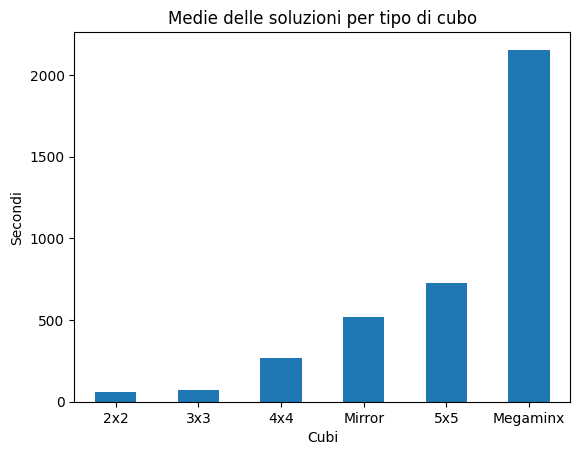

In [6]:
# Creazione grafico
df.groupby(by="Cubo")["Secondi"].mean().sort_values().plot.bar()
plt.title("Medie delle soluzioni per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")
plt.xticks(rotation=0)
plt.show()

In [7]:
# Numero di risoluzioni dei diversi cubi
df["Cubo"].value_counts()

Cubo
3x3         71
2x2         53
4x4         48
5x5         24
Mirror       9
Megaminx     3
Name: count, dtype: int64

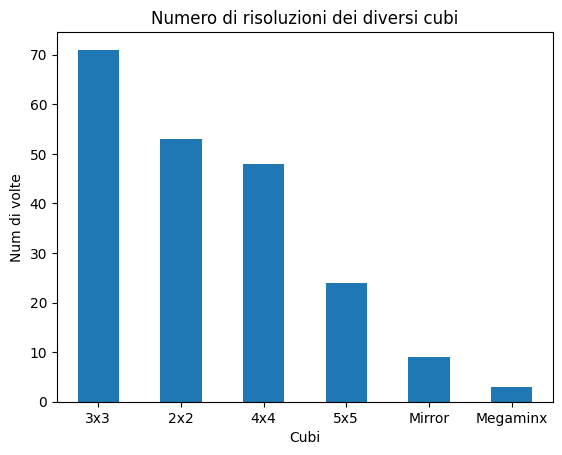

In [8]:
# Creazione grafico
df["Cubo"].value_counts().plot.bar()
plt.title("Numero di risoluzioni dei diversi cubi")
plt.ylabel("Num di volte")
plt.xlabel("Cubi")
plt.xticks(rotation=0)
plt.show()

In [9]:
# Aggiunta e riordinamento colonne
df = df.assign(Anno=df["Data"].dt.year)
df = df.assign(Mese=df["Data"].dt.month)
df = df.assign(Giorno=df["Data"].dt.day)
df = df[["Data", "Anno", "Mese", "Giorno", "Secondi", "Tempo", "Cubo"]] # Riordinamento colonne
df = df.rename(columns={"Data":"Data completa"}) # Cambio nome colonna Data
df["Mese"] = df["Mese"].replace({1:"Gen",
                                 2:"Feb",
                                 3:"Mar",
                                 4:"Apr",
                                 5:"Mag",
                                 6:"Giu",
                                 7:"Lug",
                                 8:"Ago",
                                 9:"Set",
                                 10:"Ott",
                                 11:"Nov",
                                 12:"Dic"
                                 })

In [10]:
# Numero di risoluzioni del 2025 per ogni mese
df_2025 = df[df["Anno"] == 2025]
df_2025["Mese"].value_counts()

Mese
Gen    41
Feb    35
Ago    29
Nov    25
Mag    24
Lug    14
Set    12
Mar    12
Ott     6
Apr     2
Name: count, dtype: int64

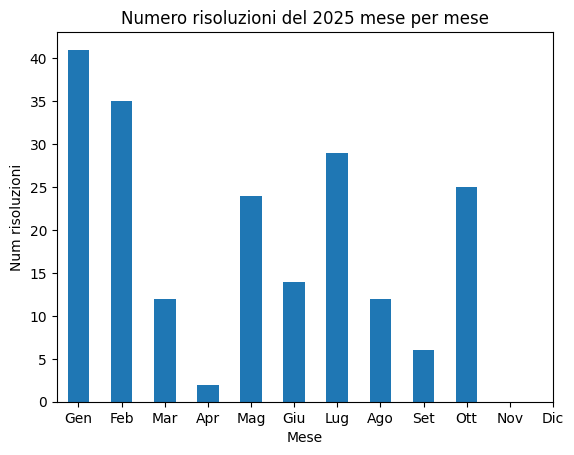

In [11]:
# Grafico del numero di risoluzioni del 2025 mese per mese
df_2025["Data completa"].dt.month.value_counts().sort_index().plot(kind="bar")
plt.title("Numero risoluzioni del 2025 mese per mese")
plt.ylabel("Num risoluzioni")
plt.xlabel("Mese")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11],
           labels=["Gen", "Feb", "Mar", "Apr", "Mag", "Giu", "Lug", "Ago", "Set", "Ott", "Nov", "Dic"],
           rotation=0)
plt.show()

In [12]:
# Ultime 10 risoluzioni
df.tail(10)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo
198,2025-11-14,2025,Nov,14,269.69,"(4, 29.69)",4x4
199,2025-11-14,2025,Nov,14,225.73,"(3, 45.73)",4x4
200,2026-01-10,2026,Gen,10,384.44,"(6, 24.44)",Mirror
201,2026-01-10,2026,Gen,10,48.48,"(0, 48.48)",2x2
202,2026-01-10,2026,Gen,10,101.49,"(1, 41.49)",2x2
203,2026-01-10,2026,Gen,10,21.43,"(0, 21.43)",2x2
204,2026-01-10,2026,Gen,10,65.97,"(1, 5.97)",3x3
205,2026-01-10,2026,Gen,10,40.44,"(0, 40.44)",3x3
206,2026-01-10,2026,Gen,10,53.02,"(0, 53.02)",3x3
207,2026-01-10,2026,Gen,10,242.95,"(4, 2.95)",4x4


# Cubo 2x2

In [13]:
# Detaframe delle soluzioni del cubo 2x2
df_2x2 = df[df["Cubo"] == "2x2"]
df_2x2.tail(10)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo
152,2025-08-24,2025,Ago,24,68.52,"(1, 8.52)",2x2
155,2025-08-30,2025,Ago,30,23.07,"(0, 23.07)",2x2
188,2025-11-14,2025,Nov,14,59.16,"(0, 59.16)",2x2
189,2025-11-14,2025,Nov,14,58.66,"(0, 58.66)",2x2
190,2025-11-14,2025,Nov,14,41.00,"(0, 41.0)",2x2
191,2025-11-14,2025,Nov,14,47.43,"(0, 47.43)",2x2
192,2025-11-14,2025,Nov,14,39.08,"(0, 39.08)",2x2
201,2026-01-10,2026,Gen,10,48.48,"(0, 48.48)",2x2
202,2026-01-10,2026,Gen,10,101.49,"(1, 41.49)",2x2
203,2026-01-10,2026,Gen,10,21.43,"(0, 21.43)",2x2


In [14]:
# Tempo medio mensile soluzioni cubo 2x2
df_2x2.groupby(by=["Mese"], sort=False)["Secondi"].mean().round(2)

Mese
Gen    87.30
Feb    51.17
Mar    40.98
Mag    57.89
Ago    40.94
Nov    49.07
Name: Secondi, dtype: float64

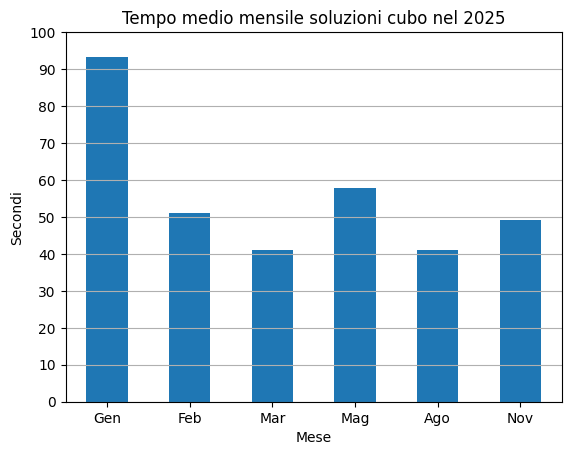

In [15]:
# Grafico tempo medio mensile soluzioni cubo 2x2
modulo_rubik.grafico_medie_mensili(df_cubo=df_2x2, anno=2025)

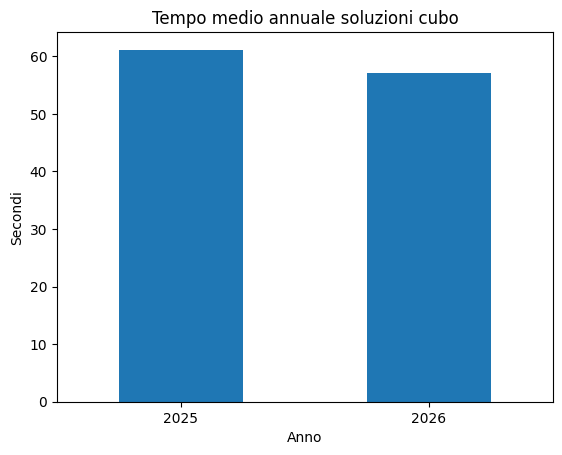

In [23]:
modulo_rubik.grafico_medie_annuali(df_cubo=df_2x2)

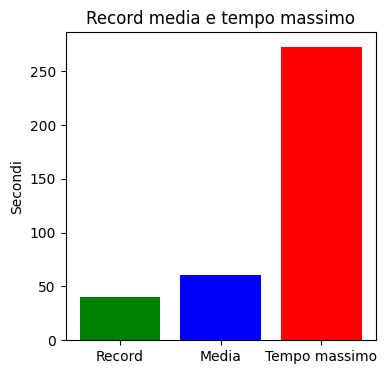

In [24]:
modulo_rubik.grafico_record_media_massimo(df_2x2)

# Cubo 3x3

In [16]:
# Detaframe delle soluzioni del cubo 3x3
df_3x3 = df[df["Cubo"] == "3x3"]
df_3x3.tail(10)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo
186,2025-11-11,2025,Nov,11,46.41,"(0, 46.41)",3x3
187,2025-11-11,2025,Nov,11,52.46,"(0, 52.46)",3x3
193,2025-11-14,2025,Nov,14,67.33,"(1, 7.33)",3x3
194,2025-11-14,2025,Nov,14,54.56,"(0, 54.56)",3x3
195,2025-11-14,2025,Nov,14,67.76,"(1, 7.76)",3x3
196,2025-11-14,2025,Nov,14,53.72,"(0, 53.72)",3x3
197,2025-11-14,2025,Nov,14,50.31,"(0, 50.31)",3x3
204,2026-01-10,2026,Gen,10,65.97,"(1, 5.97)",3x3
205,2026-01-10,2026,Gen,10,40.44,"(0, 40.44)",3x3
206,2026-01-10,2026,Gen,10,53.02,"(0, 53.02)",3x3


In [17]:
# Tempo medio mensile soluzioni cubo 3x3
df_3x3.groupby(by=["Mese"], sort=False)["Secondi"].mean().round(2)

Mese
Gen    88.21
Feb    70.47
Mar    62.34
Mag    64.13
Lug    74.78
Ago    85.53
Ott    69.29
Nov    56.88
Name: Secondi, dtype: float64

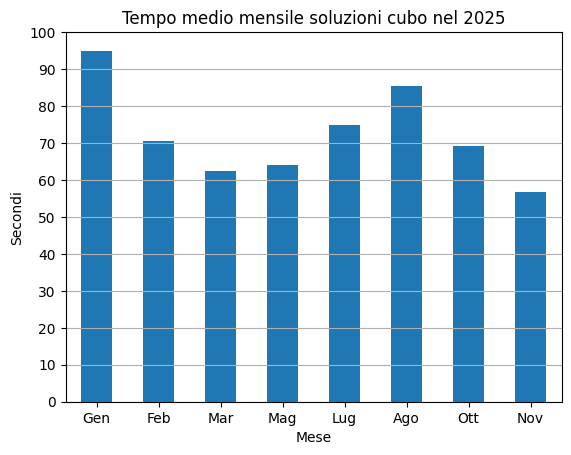

In [18]:
# Grafico tempo medio mensile soluzioni cubo 3x3
modulo_rubik.grafico_medie_mensili(df_cubo=df_3x3, anno=2025)

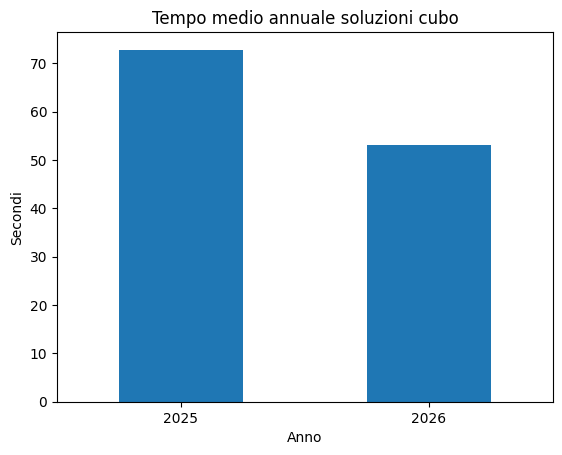

In [19]:
modulo_rubik.grafico_medie_annuali(df_cubo=df_3x3)

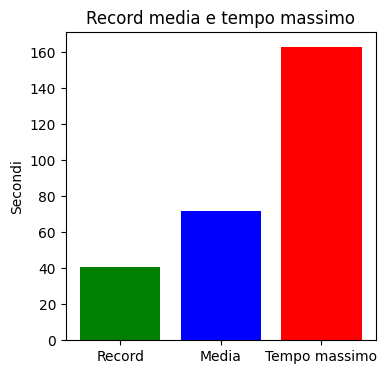

In [21]:
modulo_rubik.grafico_record_media_massimo(df_3x3)

In [20]:
# to delete
df_3x3.tail(10)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo
186,2025-11-11,2025,Nov,11,46.41,"(0, 46.41)",3x3
187,2025-11-11,2025,Nov,11,52.46,"(0, 52.46)",3x3
193,2025-11-14,2025,Nov,14,67.33,"(1, 7.33)",3x3
194,2025-11-14,2025,Nov,14,54.56,"(0, 54.56)",3x3
195,2025-11-14,2025,Nov,14,67.76,"(1, 7.76)",3x3
196,2025-11-14,2025,Nov,14,53.72,"(0, 53.72)",3x3
197,2025-11-14,2025,Nov,14,50.31,"(0, 50.31)",3x3
204,2026-01-10,2026,Gen,10,65.97,"(1, 5.97)",3x3
205,2026-01-10,2026,Gen,10,40.44,"(0, 40.44)",3x3
206,2026-01-10,2026,Gen,10,53.02,"(0, 53.02)",3x3


In [ ]:
# Detaframe delle soluzioni del cubo 4x4
df_4x4 = df[df["Cubo"] == "4x4"].sort_values(by="Secondi")
# df_4x4

In [ ]:
# Detaframe delle soluzioni del cubo 5x5
df_5x5 = df[df["Cubo"] == "5x5"].sort_values(by="Secondi")
# df_5x5